# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-5-차이를 설명하는 통계모형-1-살충제-3 (64일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 차이를 설명하는 간단한 통계모형

## 이원분산분석 테스트  -- ANOVA


이전에 살충제 예제를 가지고 일원 분산 분석을 시행 하였습니다. 이번에는 간단하게 2개의 독립변수를 갖는 분산분석에 대해서 정리하도록 하겠습니다. 저번과 이번을 정리하고 이것을 일반화 하면 다원 분산 분석을 이해하기 쉬울 것 같습니다.

http://www.sthda.com/english/wiki/two-way-anova-test-in-r

### 이원분산분석 이란?

관심변수를 설명하는데, 두개의 독립변수가 동시적으로 영향을 주는 경우 분석 인 경우 이원 분산 분석을 이용합니다. 그룹하는 변수들을 factors 라고 하고 factors 에서 서로 다른 범주들을 levels (수준) 이라고 합니다. 각 factors 에서 수준끼리 결합된 것을 셀 (cell) 이라고 합니다.

### 이원 분산 분석 검정 영가설

이원 분산 분석에 대한 검정 영가설 

1. 범주형 변수 A 평균에 대한 차이점이 없다.
2. 범주형 변수 B 평균에 대한 차이점이 없다.
3. factors A, B 는 서로 독립적이다.

이에 대한 대립가설은 
1. 1), 2) 에 대한 대립가설은 평균들이 다르다.
2. 3) 에 대한 대립가설은 A, B 가 서로 종속적이다.


### 이원 분산 분석 검정에 대한 가정

다른 모든 분산 분석처럼 각 셀에 있는 관측값들은 정규 분포이고 등분산이어야 한다. 따라서 먼저 ANOVA 적용전에 이러한 가정이 맞는지 먼저 확인을 해야 합니다.

### 데이터 준비

다음 데이터는 기니피그의 치아 성장에 대한 비타민 C 의 영향 에 대한 조사 데이터 입니다. R 에 데이터가 준비 되어 있으며, 데이터는 ToothGrowth 입니다.

데이터는 60마리 기니피그의 상아질모세포 길이 입니다. (odontoblasts: 치아성장을 담당하는 세포). 기니피그는 3가지 비타민 C 용량 (0.5, 1, 2) 중에 하나를 복용하고 비타민 C 형태는 오렌지 쥬스 또는 아스코르빈산(비타민 C 형태로 코팅 VC 로 표시) 입니다.

In [2]:
my_data <- ToothGrowth
head(my_data)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


이것을 랜덤하게 데이터를 확인 하는 방법은 sample_n() 함수를 이용합니다. sample_n() 함수는 dplyr 패키지에 있습니다.

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
# 10 개의 데이터를 임의로 확인 해 봅니다.
set.seed(1234)
sample_n(my_data, 10)

,len,supp,dose
7,11.2,VC,0.5
37,8.2,OJ,0.5
36,10.0,OJ,0.5
58,27.3,OJ,2.0
49,14.5,OJ,1.0
57,26.4,OJ,2.0
1,4.2,VC,0.5
13,15.2,VC,1.0
35,14.5,OJ,0.5
27,26.7,VC,2.0


In [5]:
# 데이터 구조를 확인해 봅니다.
str(my_data)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


3개의 변수가 있습니다.  
* len : 기니피그 치아 모근
* supp : 복용 형태 OJ : 오렌지 주스, VC : 아스코르빈산
* dose : 용량 , 0.5, 1, 2 

dose 가 숫자로 되어 있으므로 범주형 변수로 변경을 해야 합니다. factor() 함수를 이용합니다.

In [6]:
# Convert dose as a factor and recode the levels
# as "D0.5", "D1", "D2"
my_data$dose <- factor(my_data$dose, levels = c(0.5,1,2), labels=c("D0.5", "D1", "D2"))
head(my_data)
sample_n(my_data, 10)

len,supp,dose
4.2,VC,D0.5
11.5,VC,D0.5
7.3,VC,D0.5
5.8,VC,D0.5
6.4,VC,D0.5
10.0,VC,D0.5


,len,supp,dose
42,23.3,OJ,D1
33,17.6,OJ,D0.5
17,13.6,VC,D1
53,22.4,OJ,D2
58,27.3,OJ,D2
47,25.8,OJ,D1
16,17.3,VC,D1
15,22.5,VC,D1
10,7.0,VC,D0.5
12,16.5,VC,D1


용량과 용법에 따른 빈도수를 파악하고 자 하려면 교차표를 이용해 봅니다.

In [7]:
table(my_data$supp, my_data$dose)

    
     D0.5 D1 D2
  OJ   10 10 10
  VC   10 10 10

### 데이터의 도표화

In [8]:
library("ggpubr")

Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:dplyr’:

    vars

Loading required package: magrittr


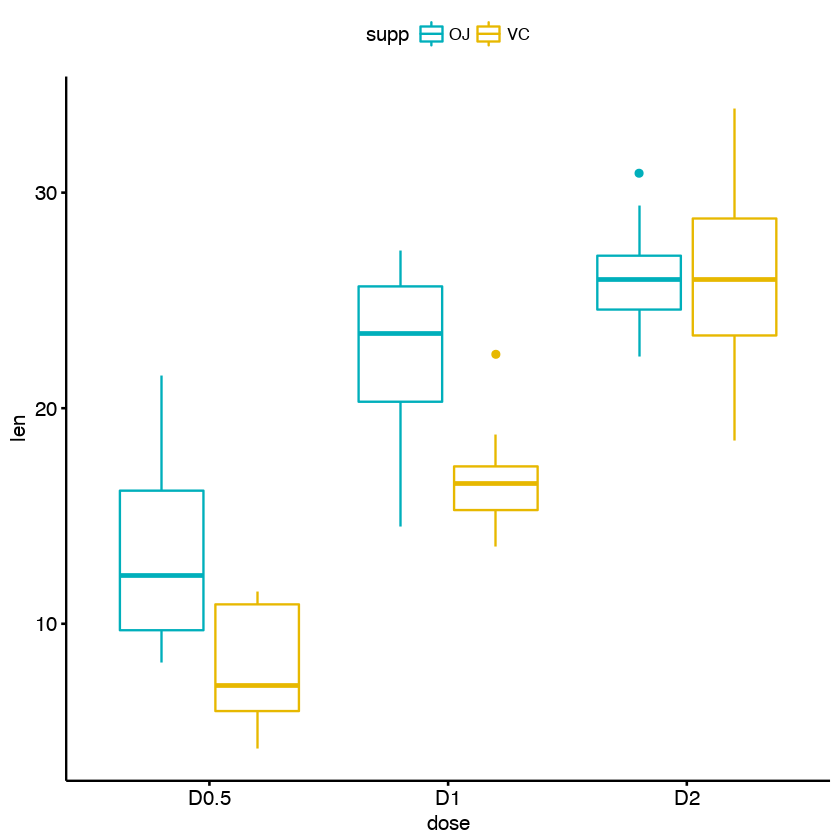

In [10]:
# 2개 변수에 대한 박스상자 
# 치근의 용량에 대한 표시 (dose)
# 용법에 따른 색깔 표시  (supp)
ggboxplot(my_data, x = "dose", y = "len", color="supp", palette = c("#00AFBB", "#E7B800"))

In [ ]:
# 다중 그룹에 대한 라인 플롯
# 용량에 따른 치모근 의 길이 표시
# 용법 (supp) 에 대한 것은 상자 색깔 표시
# 